In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor # reti neurali opache per definizione
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import Pipeline

from sklearn.inspection import permutation_importance, plot_partial_dependence

In [2]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

In [3]:
X.sample(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
3842,2.1977,17.0,2.780576,1.064748,2423.0,4.357914,34.18,-118.44
13682,2.5625,16.0,5.459746,1.103814,956.0,2.025424,34.14,-117.23
16987,4.7045,17.0,3.237745,1.041667,683.0,1.674020,37.55,-122.26
7233,3.0179,42.0,3.757463,1.033582,1060.0,3.955224,34.01,-118.14
11790,3.5265,11.0,5.285115,1.092243,1390.0,2.914046,38.80,-121.22


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [5]:
steps = [
    ( 'scaler', QuantileTransformer() ), # prova a toglierlo!
    ( 'model', MLPRegressor( hidden_layer_sizes=(20, 20), alpha=0.5 ) ),
]
pipeline = Pipeline(steps)

In [6]:
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.7316416117378165

In [7]:
res = permutation_importance(pipeline, X_test, y_test, n_repeats=10)

In [8]:
res

{'importances_mean': array([0.83628142, 0.05952934, 0.10538158, 0.01144929, 0.01040648,
        0.18571884, 0.72938793, 0.59900349]),
 'importances_std': array([0.0136078 , 0.00161161, 0.00427565, 0.00207444, 0.00112924,
        0.00703878, 0.01186674, 0.01525841]),
 'importances': array([[0.82618121, 0.84727728, 0.84154273, 0.81117677, 0.82721723,
         0.86436818, 0.84096914, 0.83420847, 0.82902225, 0.84085094],
        [0.05935939, 0.06134903, 0.06292037, 0.0571081 , 0.0592225 ,
         0.05882648, 0.05779877, 0.06051804, 0.05868672, 0.05950399],
        [0.10953189, 0.10269346, 0.09898048, 0.1019353 , 0.11250354,
         0.10480023, 0.10655725, 0.11148732, 0.10337321, 0.10195316],
        [0.01112   , 0.01242211, 0.0095055 , 0.01515727, 0.00819293,
         0.01051095, 0.00938125, 0.01257383, 0.01417418, 0.01145485],
        [0.01045544, 0.01201819, 0.01158904, 0.0109517 , 0.01201358,
         0.00979411, 0.00874333, 0.00977164, 0.00908533, 0.00964241],
        [0.18357013, 0.

In [11]:
df = pd.DataFrame(res['importances'].T, columns=X.columns)

In [12]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.826181,0.059359,0.109532,0.011120,0.010455,0.183570,0.726859,0.617796
1,0.847277,0.061349,0.102693,0.012422,0.012018,0.197225,0.726306,0.603616
2,0.841543,0.062920,0.098980,0.009505,0.011589,0.176786,0.741403,0.569830
3,0.811177,0.057108,0.101935,0.015157,0.010952,0.180107,0.704927,0.589977
4,0.827217,0.059223,0.112504,0.008193,0.012014,0.182440,0.730026,0.590616
5,0.864368,0.058826,0.104800,0.010511,0.009794,0.182080,0.730681,0.588931
6,0.840969,0.057799,0.106557,0.009381,0.008743,0.189139,0.730729,0.619220
7,0.834208,0.060518,0.111487,0.012574,0.009772,0.179069,0.749365,0.588112
8,0.829022,0.058687,0.103373,0.014174,0.009085,0.188402,0.715994,0.615194
9,0.840851,0.059504,0.101953,0.011455,0.009642,0.198370,0.737590,0.606743


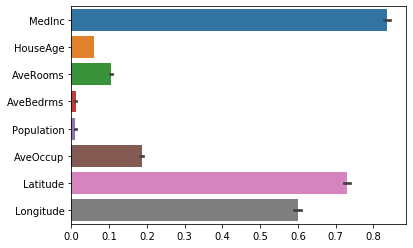

In [14]:
sns.barplot(data=df, orient='h')

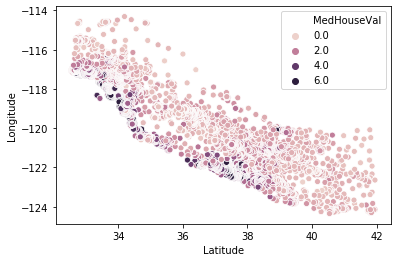

In [15]:
sns.scatterplot(data=X, x='Latitude', y='Longitude', hue=y)

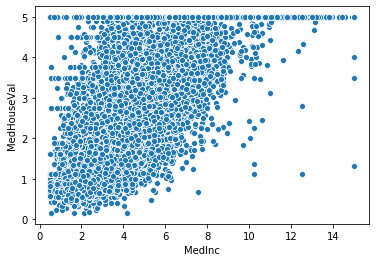

In [16]:
sns.scatterplot(data=X, x='MedInc', y=y)

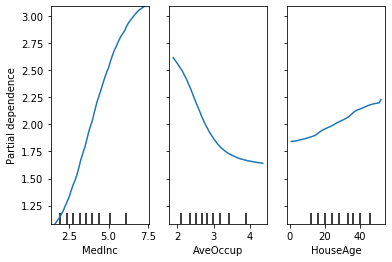

In [18]:
plot_partial_dependence( pipeline, X_test, features=['MedInc', 'AveOccup', 'HouseAge'] )

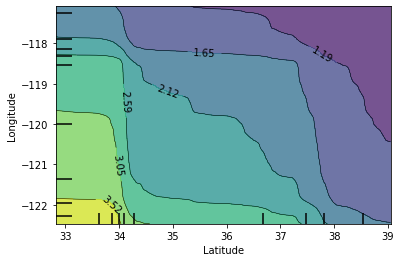

In [20]:
plot_partial_dependence( pipeline, X_test, features=[['Latitude', 'Longitude']] )